# **Exploratory Data Analysis**

This notebook contains exploration of 4 data, raw, light cleaning, hard cleaning and fully cleaned data in order to see original pattern and the actual message of review text.

In [ ]:
# Ignore warning
from warnings import filterwarnings
filterwarnings('ignore')

# Core library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.cm as cm

# Defaults
pd.set_option('display.max_colwidth', None)
plt.style.use('seaborn-v0_8-whitegrid')

RAW_PATH = '../data/raw/review.csv'

## **Exploratory of Raw Data Analysis**

To see the original pattern of data that has been scraped before, we'll explore if there is any pattern contains in this data.

In [2]:
raw_df = pd.read_csv(RAW_PATH)
raw_df.head()

,text,rating,date
0,apik wes.,5,2025-11-29 10:45:48
1,"Mesin pencarian yang aneh, di cari barang malah nampilin nama toko aneh banget, dan gw ketik ""samsung"" di toko SAMSUNG official malah muncul ""Produk tidak di temukan"" bro yang benar saja. Tolong diperbaiki lah ini mesin pencarian sanggat merusak user experient.",1,2025-11-29 10:29:39
2,sangat puas blja produk dtoko nih,5,2025-11-29 10:19:03
3,Lagging Terusss! Sampe nge-Crashing terus menerus.,1,2025-11-29 10:19:02
4,lumayan bagus bro,5,2025-11-29 10:17:06


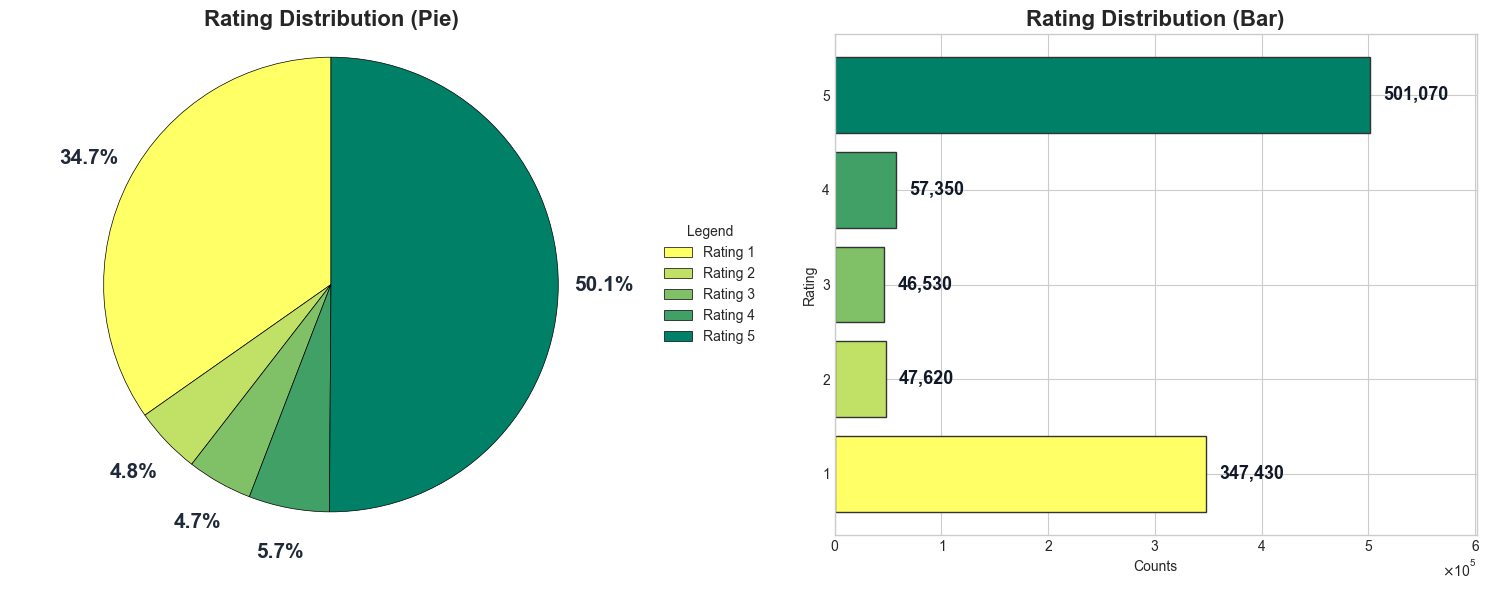

In [71]:
TP_GREEN = "#00AA5B"

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 3))

rating_counts = raw_df.rating.value_counts().sort_index()

# Color Palette
cmap = cm.get_cmap("summer")
norm_values = (rating_counts.index - rating_counts.index.min())/(rating_counts.index.max() - rating_counts.index.min())
pie_colors = [cmap(v) for v in norm_values][::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie Chart
wedges, _ = ax1.pie(
    rating_counts.values, startangle=90, colors=pie_colors, labels=None,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)

# percentages
for i, w in enumerate(wedges):
    ang = (w.theta2 + w.theta1) / 2
    x = 1.20 * np.cos(np.deg2rad(ang))
    y = 1.20 * np.sin(np.deg2rad(ang))

    percent = rating_counts.values[i] / rating_counts.sum() * 100

    ax1.text(
        x, y, f"{percent:.1f}%", ha="center", va="center",
        fontsize=15, weight="bold", color="#1F2937"
    )

# Pie chart legend
legend_labels = [f"Rating {idx}" for idx in rating_counts.index]

ax1.legend(
    wedges, legend_labels, title="Legend",
    loc="center left", bbox_to_anchor=(1, 0.5),
    fontsize=10
)

ax1.set_title("Rating Distribution (Pie)", fontsize=16, weight="bold")
ax1.axis("equal")

# Bar Chart
bars = ax2.barh(
    rating_counts.index, rating_counts.values,
    color=pie_colors, edgecolor="#333333"
)

ax2.set_title("Rating Distribution (Bar)", fontsize=16, weight="bold")

ax2.xaxis.set_major_formatter(formatter)
ax2.set_xlabel("Counts")
ax2.set_ylabel("Rating")

# Give right padding
ax2.margins(x=0.2)

# annotate bars
for bar in bars:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2

    ax2.text(
        x + max(rating_counts.values)*0.025, y,
        f"{int(x):,}",
        ha="left", va="center",
        color="#111827", weight="bold", fontsize=13
    )

plt.tight_layout(w_pad=3)
plt.show()

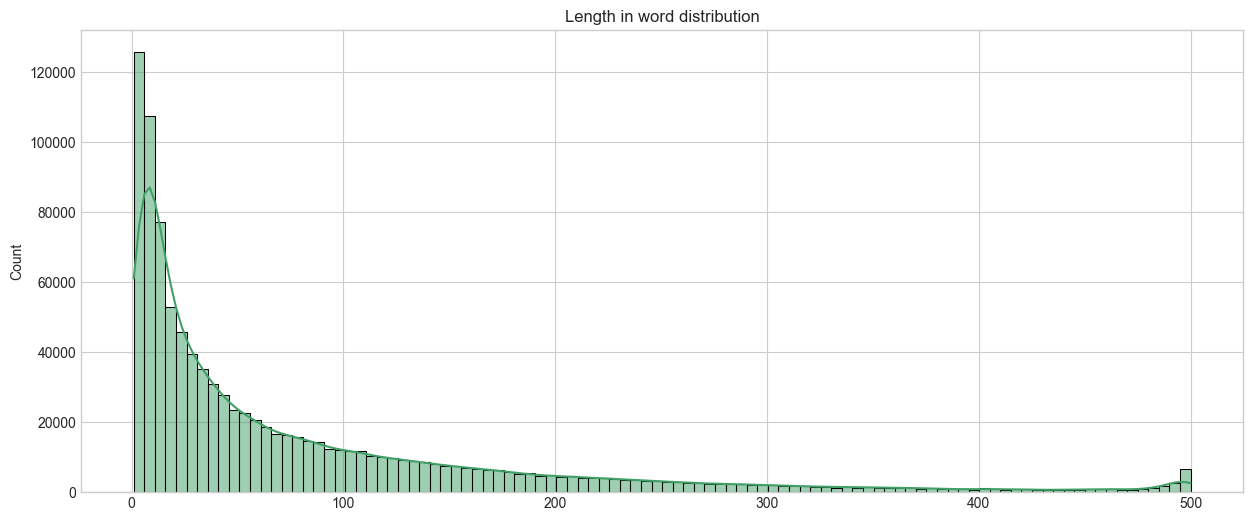

In [89]:
length = [len(str(sentence)) for sentence in raw_df.text]

plt.figure(figsize=(15,6))
sns.histplot(length, bins=100, kde=True, edgecolor='black', color=pie_colors[3])
plt.title('Length in word distribution')
plt.show()